# Contents
- [EDA](#eda)  
- [Preprocessing](#prepro)  
    - [Test/Train Split](#tt_splt)  
    - [Standardize Data](#std)  
    - [Normalize Data](#norm)
    - [Polynomial Transformation](#poly)  
    - [Logarithmic Transformation](#log)
- [Linear Regression Modeling](#model)
    - [Cross Validation](#crs_val)  
    - [Model Evaluation](#eval)  
    - [Feature Selection](#feat_sel)
    - [Regularization](#reg)
    - [Interpretation](#inter)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

from sklearn import metrics
from sklearn import pipeline

# EDA <a name="eda"></a>

## Load Data

In [2]:
df = pd.read_csv('data/ex1data2.txt', header=None)
df.columns = ['size', 'bed_num', 'price']

In [3]:
df.head()

,size,bed_num,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Plot Variable Distributions
Determine if variables are normally distributed

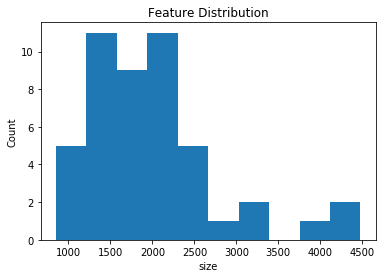

In [170]:
plt.hist(df.iloc[:, 0])
plt.xlabel(df.columns[0])
plt.ylabel('Count')
plt.title('Feature Distribution');

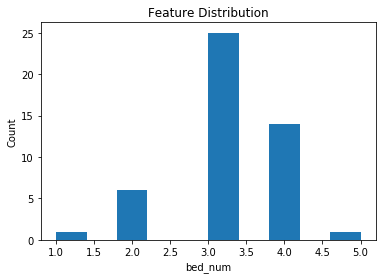

In [171]:
plt.hist(df.iloc[:, 1])
plt.xlabel(df.columns[1])
plt.ylabel('Count')
plt.title('Feature Distribution');

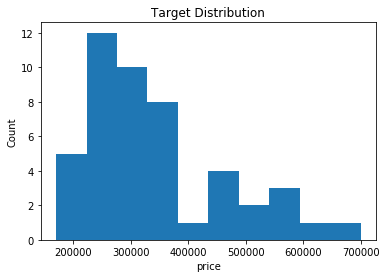

In [175]:
plt.hist(df.iloc[:, -1])
plt.xlabel(df.columns[-1])
plt.ylabel('Count')
plt.title('Target Distribution');

## Plot Features vs Target

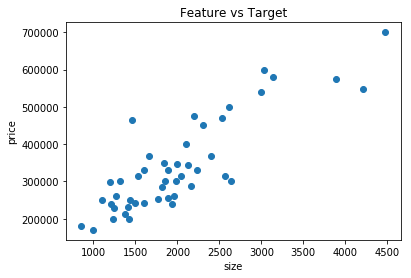

In [172]:
plt.scatter(df.iloc[:, 0], df.iloc[:, -1])
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1])
plt.title('Feature vs Target');

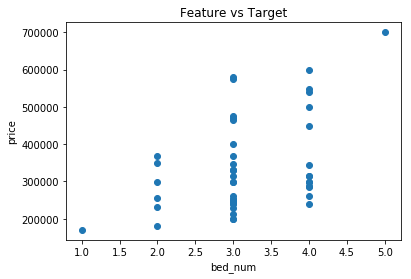

In [173]:
plt.scatter(df.iloc[:, 1], df.iloc[:, -1])
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[-1])
plt.title('Feature vs Target');

## Feature Relationship

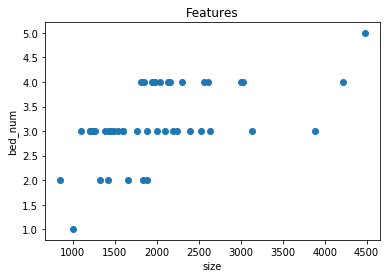

In [174]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Feature Relationship');

# Preprocessing <a name="prepro"></a>

## Define Variables

In [4]:
# independent (feature) variables
X = df.iloc[:, 0:-1]

In [5]:
# dependent (target) variable
y = df.iloc[:, -1]

## Test/Train Split <a name="tt_splt"></a>
Split data into feature training, feature test, target training and target test variables

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.head()

,size,bed_num
8,1380,3
3,1416,2
6,1534,3
40,1664,2
33,3137,3


In [65]:
y_train.head()

8     212000
3     232000
6     314900
40    368500
33    579900
Name: price, dtype: int64

In [66]:
X_test.head()

,size,bed_num
27,2526,3
39,2162,4
26,1458,3
43,1200,3
24,3890,3


In [67]:
y_test.head()

27    469000
39    287000
26    464500
43    299000
24    573900
Name: price, dtype: int64

## Standardize Data <a name="std"></a>
For each feature, subtract mean and then divide by standard deviation

In [8]:
X_train_std = pd.DataFrame()

for feature in X_train.columns:
    X_train_mean = np.mean(X_train[feature])
    X_train_sigma = np.std(X_train[feature])
    X_train_std[feature] = (X_train[feature] - X_train_mean) / X_train_sigma

In [9]:
X_train_std.head()

,size,bed_num
8,-0.775626,-0.166667
3,-0.727519,-1.400000
6,-0.569837,-0.166667
40,-0.396120,-1.400000
33,1.572235,-0.166667


### StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

In [211]:
# create instance of scaler
std_scaler = StandardScaler()

In [12]:
# fit scaler to training feature data
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# apply scaler to feature data
std_scaler.transform(X_train)[0:5]

array([[-0.77562586, -0.16666667],
       [-0.72751943, -1.4       ],
       [-0.56983725, -0.16666667],
       [-0.3961196 , -1.4       ],
       [ 1.57223508, -0.16666667]])

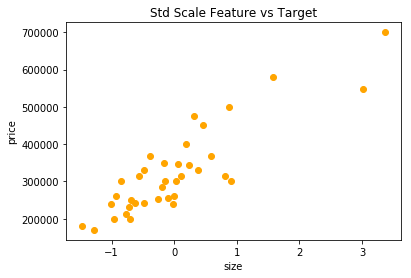

In [177]:
plt.scatter([feature[0] for feature in std_scaler.transform(X_train)], y_train, c='orange')
plt.title('Std Scale Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1]);

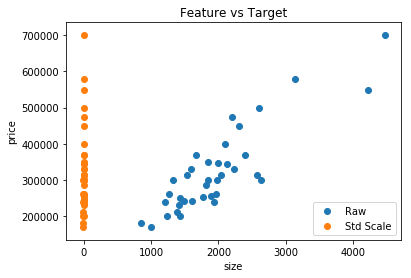

In [178]:
plt.scatter(X_train.iloc[:, 0], y_train, label='Raw')
plt.scatter([feature[0] for feature in std_scaler.transform(X_train)], y_train, label='Std Scale')
plt.title('Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1])
plt.legend();

### Apply to Data

In [16]:
# fit and apply to training data
X_train_std = std_scaler.fit_transform(X_train)

In [17]:
# apply to test data
X_test_std = std_scaler.transform(X_test)

## Normalize Data <a name="norm"></a>
For each feature, subtract minimum and then divide by difference between maximum and minimum  
Scaled values are between 0 and 1

In [18]:
X_train_norm = pd.DataFrame()

for feature in X.columns:
    X_train_min = min(X_train[feature])
    X_train_max = max(X_train[feature])
    X_train_norm[feature] = (X_train[feature] - X_train_min) / (X_train_max - X_train_min)

In [20]:
X_train_norm.head()

,size,bed_num
8,0.145615,0.50
3,0.155543,0.25
6,0.188086,0.50
40,0.223938,0.25
33,0.630171,0.50


### MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# create instance of scaler
norm_scaler = MinMaxScaler()

In [23]:
# fit scaler to training feature data
norm_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
# apply scaler to training feature data
norm_scaler.transform(X_train)[0:5]

array([[0.145615  , 0.5       ],
       [0.1555433 , 0.25      ],
       [0.18808605, 0.5       ],
       [0.22393822, 0.25      ],
       [0.63017099, 0.5       ]])

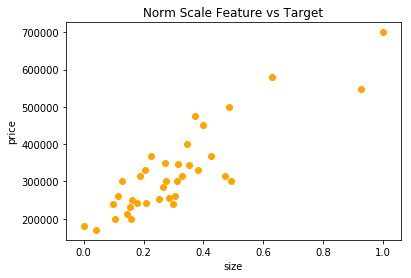

In [179]:
plt.scatter([feature[0] for feature in norm_scaler.transform(X_train)], y_train, c='orange')
plt.title('Norm Scale Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1]);

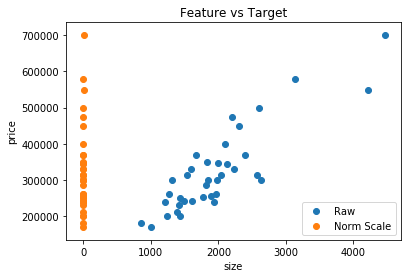

In [181]:
plt.scatter(X_train.iloc[:, 0], y_train, label='Raw')
plt.scatter([feature[0] for feature in norm_scaler.transform(X_train)], y_train, label='Norm Scale')
plt.title('Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1])
plt.legend();

### Apply to Data

In [27]:
# fit and apply to training data
X_train_norm = norm_scaler.fit_transform(X_train)

In [28]:
# apply to test data
X_test_norm = norm_scaler.transform(X_test)

## Polynomial Transformation <a name="poly"></a>
Create polynomial interaction of features for model

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# create instance of polynomial features, specify degree
poly = PolynomialFeatures(degree=2)

In [40]:
# fit scaler to training feature data
poly.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [41]:
# apply to training feature data, creates new features
poly.transform(X_train)[0:5]

array([[1.000000e+00, 1.380000e+03, 3.000000e+00, 1.904400e+06,
        4.140000e+03, 9.000000e+00],
       [1.000000e+00, 1.416000e+03, 2.000000e+00, 2.005056e+06,
        2.832000e+03, 4.000000e+00],
       [1.000000e+00, 1.534000e+03, 3.000000e+00, 2.353156e+06,
        4.602000e+03, 9.000000e+00],
       [1.000000e+00, 1.664000e+03, 2.000000e+00, 2.768896e+06,
        3.328000e+03, 4.000000e+00],
       [1.000000e+00, 3.137000e+03, 3.000000e+00, 9.840769e+06,
        9.411000e+03, 9.000000e+00]])

In [79]:
# output features
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [80]:
# output features mapped to dataframe columns
poly.get_feature_names(input_features=X_train.columns)

['1', 'size', 'bed_num', 'size^2', 'size bed_num', 'bed_num^2']

In [81]:
# polynomial features dataframe
df_poly = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names(input_features=X_train.columns))
df_poly.head()

,1,size,bed_num,size^2,size bed_num,bed_num^2
0,1.0,1380.0,3.0,1904400.0,4140.0,9.0
1,1.0,1416.0,2.0,2005056.0,2832.0,4.0
2,1.0,1534.0,3.0,2353156.0,4602.0,9.0
3,1.0,1664.0,2.0,2768896.0,3328.0,4.0
4,1.0,3137.0,3.0,9840769.0,9411.0,9.0


### Apply to Data

In [60]:
# fit and apply to training data
X_train_poly = poly.fit_transform(X_train)

In [61]:
# apply to test data
X_test_poly = poly.transform(X_test)

## Logarithmic Transformation <a name="log"></a>
Transform data into natural log scale

In [65]:
# transform training feature values to natural log scale
X_train_ln = np.log(X_train)
X_train_ln.head()

,size,bed_num
8,7.229839,1.098612
3,7.255591,0.693147
6,7.335634,1.098612
40,7.416980,0.693147
33,8.051022,1.098612


In [77]:
# transform test feature values to natural log scale
X_test_ln = np.log(X_test)

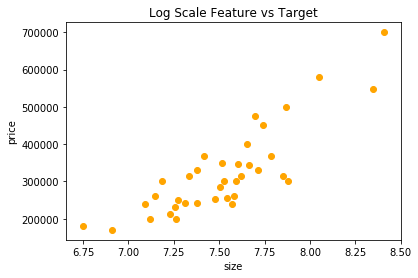

In [182]:
plt.scatter(X_train_ln.iloc[:, 0], y_train, c='orange')
plt.title('Log Scale Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1]);

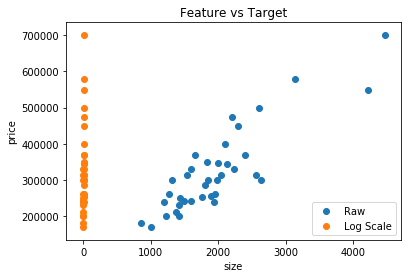

In [183]:
plt.scatter(X_train.iloc[:, 0], y_train, label='Raw')
plt.scatter(X_train_ln.iloc[:, 0], y_train, label='Log Scale')
plt.title('Feature vs Target')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[-1])
plt.legend();

# Linear Regression Modeling <a name="model"></a>

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
# create instance of linear regression model
lin_reg = LinearRegression()

In [85]:
# fit model on training data
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
# output model coefficients
lin_reg.coef_

array([   143.21853204, -13512.56442597])

In [163]:
# output model intercept
lin_reg.intercept_

84763.622522194

In [164]:
# features
X.columns

Index(['size', 'bed_num'], dtype='object')

In [166]:
# model equation
print(f'y = {lin_reg.coef_[0]}*{X.columns[0]} + {lin_reg.coef_[1]}*{X.columns[1]} + {lin_reg.intercept_}')

y = 143.21853204051797*size + -13512.56442596715*bed_num + 84763.622522194


In [89]:
# predict target variable with test feature data as input
lin_reg.predict(X_test)

array([405995.94117864, 340351.83108993, 253038.54895937, 216088.16769291,
       601346.01888191, 221673.69044249, 314908.95480087, 464808.73543314,
       460368.96093988, 201766.31448886])

## Cross Validation <a name="crs_val"></a>
Score model multiple times using different segments of data

In [146]:
from sklearn.model_selection import cross_val_score

In [150]:
# output R-squared scores for cv number of model trials
cross_val_score(lin_reg, X_train, y_train, cv=10)

array([ 0.3581976 ,  0.87971766, -0.17415578,  0.78070773,  0.43215675,
       -0.82207397, -0.48738358,  0.73671459, -1.1040321 ,  0.37980183])

In [159]:
# calculate average score for all cross validation trials
np.mean(cross_val_score(lin_reg, X_train, y_train, cv=10))

0.09796507433298893

## Model Evaluation <a name="eval"></a>

### Plot of Observed and Predicted Targets

In [137]:
predictions = lin_reg.predict(X_test)

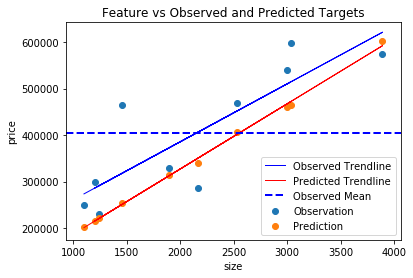

In [184]:
# plot feature vs observed and predicted values for target
fig, ax = plt.subplots()
ax.scatter(X_test.iloc[:, 0], y_test, label='Observation')
z = np.polyfit(X_test.iloc[:, 0], y_test, 1)
p = np.poly1d(z)
ax.plot(X_test.iloc[:, 0], p(X_test.iloc[:, 0]), "b-", linewidth=1, label='Observed Trendline')
ax.scatter(X_test.iloc[:, 0], predictions, label='Prediction')
z = np.polyfit(X_test.iloc[:, 0], predictions, 1)
p = np.poly1d(z)
ax.plot(X_test.iloc[:, 0], p(X_test.iloc[:, 0]), "r-", linewidth=1, label='Predicted Trendline')
ax.axhline(y=np.mean(y_test), linewidth=2, linestyle='dashed', c='b', label='Observed Mean')
ax.legend()
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[-1])
ax.set_title('Feature vs Observed and Predicted Targets');

### Calculate R-squared Value
Proportion of target variation is explained by the model

In [139]:
# sum of squared errors (observations - predictions)^2
SSE = sum((y_test - predictions)**2)
# sum squared errors from observed mean (observations - observed mean)^2
SST = sum((y_test - np.mean(y_test))**2)
# calculated r-squared score
R_sqr = 1 - SSE/SST
R_sqr

0.5148848812741442

In [140]:
# model r-squared score
lin_reg.score(X_test, y_test)

0.5148848812741442

### Plot of Accuracy

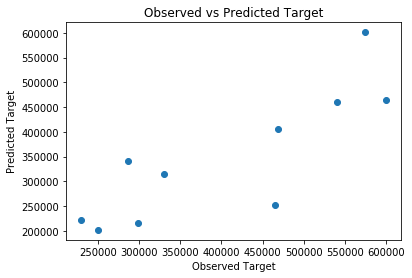

In [185]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.set_xlabel('Observed Target')
ax.set_ylabel('Predicted Target')
ax.set_title('Observed vs Predicted Target');

### Residual Plot
Determine if residuals are normally distributed as assumed by model

In [142]:
# calculate residual values (observations - predictions)
residuals = y_test - predictions

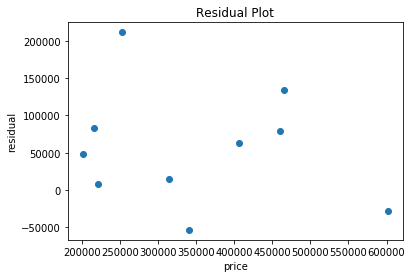

In [187]:
fig, ax = plt.subplots()
ax.scatter(predictions, residuals)
ax.set_xlabel(df.columns[-1])
ax.set_ylabel('residual')
ax.set_title('Residual Plot');

### Q-Q Plot
Determine if residuals are normally distributed as assumed by model

In [135]:
import scipy.stats as stats

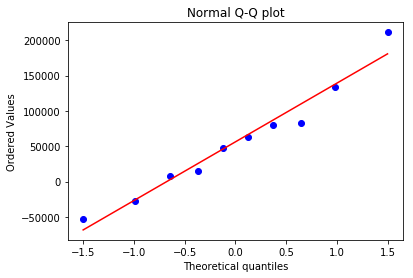

In [144]:
stats.probplot(y_test - predictions, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

## Feature Selection <a name="feat_sel"></a>
Score features to determine if they have a significant impact on model predictions

In [188]:
from sklearn import feature_selection

In [198]:
# create instance of feature selector
feat_selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k='all')

In [199]:
# fit on training data
feat_selector.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x7fe172391c80>)

In [201]:
# features
X.columns

Index(['size', 'bed_num'], dtype='object')

In [200]:
# output scores for each feature
feat_selector.scores_

array([112.88725251,   9.84075376])

In [203]:
pd.DataFrame(feat_selector.scores_, index=X.columns)

,0
size,112.887253
bed_num,9.840754


## Regularization <a name="reg"></a>
Introduces penalty for features to reduce overfitting

In [207]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate

### Ridge
Adds the L2 norm (square root of the sum of squares) of the coefficients to the cost function

In [205]:
# define alpha value for regularization
alpha = 0.1

In [209]:
# create instance of Ridge regression model
LR_ridge = linear_model.Ridge(alpha=alpha)
LR_ridge

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [222]:
# return scores of regularized model with cross validation
scores = cross_validate(LR_ridge, X_train, y_train, cv=10, scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.01233482, 0.00168157, 0.00139332, 0.00131273, 0.0030241 ,
        0.00132871, 0.00136781, 0.00120449, 0.00127339, 0.00299764]),
 'score_time': array([0.00076652, 0.00028777, 0.00030375, 0.00028467, 0.00103951,
        0.00028729, 0.00026631, 0.00028086, 0.00029278, 0.00156879]),
 'test_score': array([ 0.35766992,  0.87966237, -0.17306081,  0.78162293,  0.42931682,
        -0.81641918, -0.4889861 ,  0.73697828, -1.10518791,  0.38021206]),
 'train_score': array([0.77853321, 0.59558171, 0.8149636 , 0.76560213, 0.77074508,
        0.78892997, 0.77877799, 0.7709859 , 0.78547542, 0.78302986])}

In [223]:
np.mean(scores['test_score'])

0.09818083979975775

In [236]:
LR_ridgecv = linear_model.RidgeCV(cv=10, scoring='r2')

In [237]:
LR_ridgecv.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=10, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring='r2', store_cv_values=False)

In [240]:
LR_ridgecv.score(X_test, y_test)

0.5201850133549567

In [ ]:
# FIND BEST ALPHA?

### Lasso
Adds the L1 norm (sum of absolute values) of the coefficients to the cost function

In [215]:
# define alpha value for regularization
alpha = 0.1

In [216]:
# create instance of Lasso regression model
LR_lasso = linear_model.Lasso(alpha=alpha)
LR_lasso

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [224]:
# return scores of regularized model with cross validation
scores = cross_validate(LR_lasso, X_train, y_train, cv=10, scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.01972651, 0.00474906, 0.00261927, 0.00286627, 0.00201082,
        0.00248694, 0.00220346, 0.00192595, 0.00178385, 0.00355434]),
 'score_time': array([0.00106549, 0.00100565, 0.00065637, 0.00121069, 0.000489  ,
        0.00106716, 0.00060987, 0.00045013, 0.00045156, 0.00051665]),
 'test_score': array([ 0.35819584,  0.87971742, -0.17415392,  0.7807094 ,  0.43214692,
        -0.82206514, -0.48739366,  0.73671513, -1.10403606,  0.37980267]),
 'train_score': array([0.77853336, 0.59558187, 0.81496418, 0.76560276, 0.77074523,
        0.78893064, 0.77877804, 0.77098632, 0.78547556, 0.78303033])}

In [227]:
np.mean(scores['test_score'])

0.09796385899500452

### ElasticNet
Combines Lasso and Ridge by adding both the L1 and L2 norm of the coefficients to the cost function

In [218]:
# define alpha value for regularization
alpha = 0.1

In [219]:
# create instance of Lasso regression model
LR_elastic = linear_model.ElasticNet(alpha=alpha)
LR_elastic

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [228]:
# return scores of regularized model with cross validation
scores = cross_validate(LR_elastic, X_train, y_train, cv=10, scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.01977372, 0.00582862, 0.00354028, 0.00343323, 0.00278115,
        0.00324082, 0.0033977 , 0.00225878, 0.00273395, 0.00201464]),
 'score_time': array([0.00125837, 0.00081348, 0.0013597 , 0.00074077, 0.00129676,
        0.00057006, 0.00057101, 0.00049305, 0.00074458, 0.00045633]),
 'test_score': array([ 0.35025075,  0.87889104, -0.15808234,  0.79328226,  0.3893723 ,
        -0.73927854, -0.51116662,  0.74074625, -1.12185758,  0.38602604]),
 'train_score': array([0.77849983, 0.59554695, 0.81483611, 0.76547   , 0.77071329,
        0.78878263, 0.77876829, 0.77088808, 0.78544268, 0.78291994])}

In [231]:
np.mean(scores['test_score'])

0.10081835494978278

## Interpretation <a name="inter"></a>